In [1]:
#!/usr/bin/python

%matplotlib notebook
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import my_classifier_utils
import my_data_utils

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary','bonus', 'total_payments','exercised_stock_options','shared_receipt_with_poi','expenses',
                'email_to_poi_ratio', 'email_from_poi_ratio', 'exer_stock_ratio'] 
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

C:\Users\KCRAVOTT\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### Task 2: Remove outliers
%matplotlib notebook
import my_data_utils

<IPython.core.display.Javascript object>


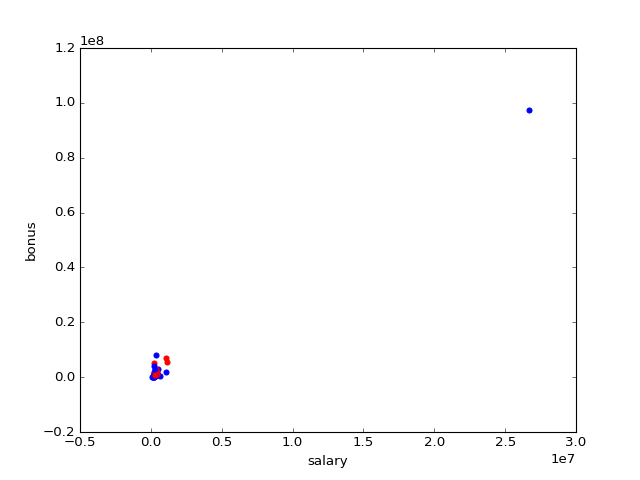

In [3]:
my_data_utils.plot_two(data_dict, 'salary', 'bonus')

In [4]:
my_data_utils.maxPrinter(data_dict, 'salary')
print 'remove max'
my_data_utils.removeMax(data_dict, 'salary')
my_data_utils.maxPrinter(data_dict, 'salary')

Max salary TOTAL 26704229
remove max
Max salary SKILLING JEFFREY K 1111258


<IPython.core.display.Javascript object>


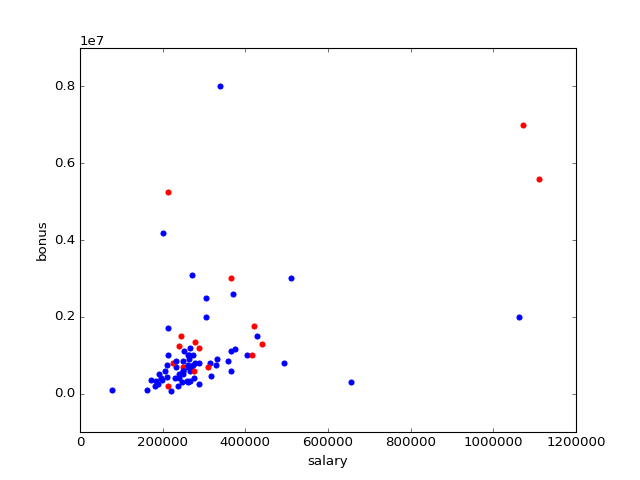

In [5]:
my_data_utils.plot_two(data_dict, 'salary', 'bonus')

<IPython.core.display.Javascript object>


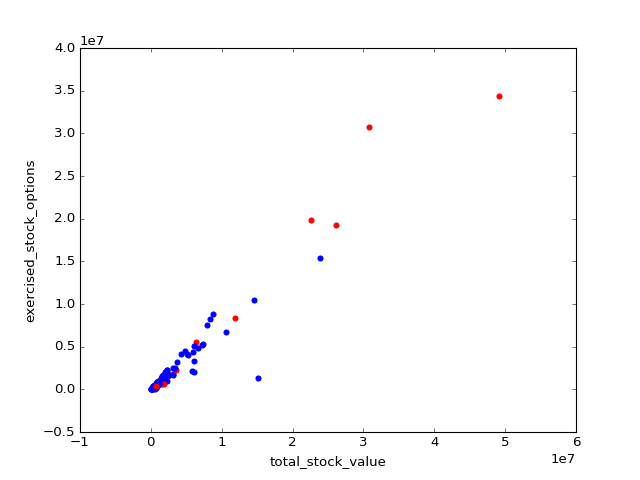

In [6]:
my_data_utils.plot_two(data_dict, 'total_stock_value', 'exercised_stock_options')

In [7]:
my_data_utils.maxPrinter(data_dict, 'restricted_stock')
my_data_utils.maxPrinter(data_dict, 'total_payments')

Max restricted_stock LAY KENNETH L 14761694
Max total_payments LAY KENNETH L 103559793


<IPython.core.display.Javascript object>


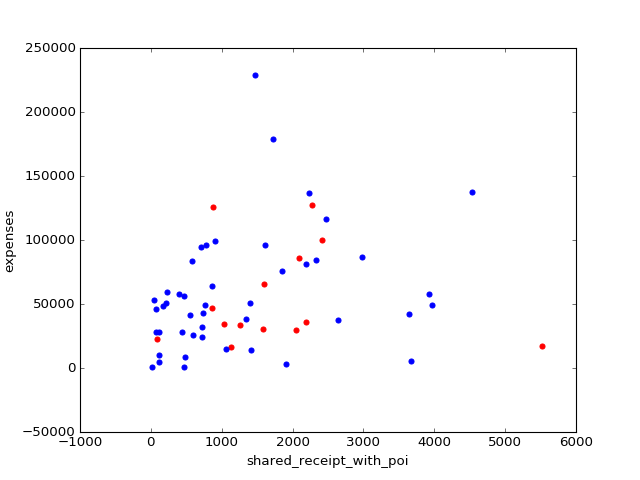

In [8]:
my_data_utils.plot_two(data_dict, 'shared_receipt_with_poi', 'expenses')

In [9]:
my_data_utils.maxPrinter(data_dict, 'shared_receipt_with_poi')

Max shared_receipt_with_poi BELDEN TIMOTHY N 5521


<IPython.core.display.Javascript object>


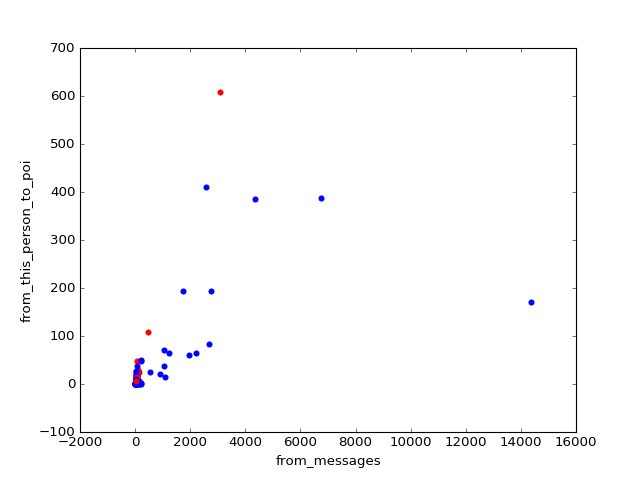

In [10]:
my_data_utils.plot_two(data_dict, 'from_messages', 'from_this_person_to_poi')

In [11]:
my_data_utils.maxPrinter(data_dict,'from_messages')
my_data_utils.maxPrinter(data_dict,'from_this_person_to_poi')

Max from_messages KAMINSKI WINCENTY J 14368
Max from_this_person_to_poi DELAINEY DAVID W 609


<IPython.core.display.Javascript object>


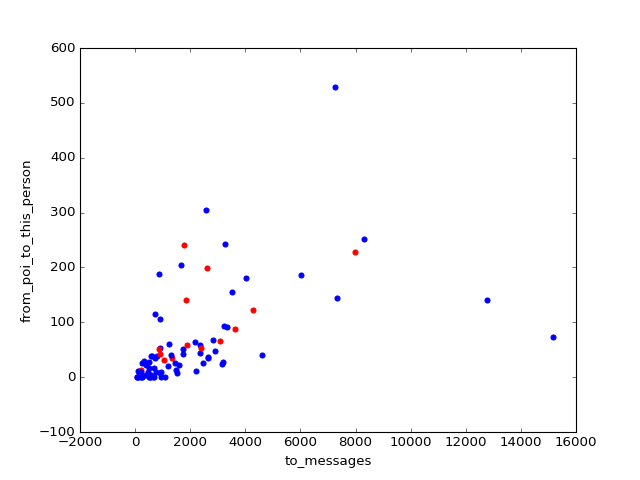

In [12]:
my_data_utils.plot_two(data_dict, 'to_messages', 'from_poi_to_this_person')

In [13]:
### Task 3: Create new feature(s)
#email_to_poi_ratio
#email_from_poi_ratio
for key in data_dict.keys():
    email_to = data_dict[key]['to_messages']
    to_poi = data_dict[key]['from_this_person_to_poi']
    email_from = data_dict[key]['from_messages']
    from_poi = data_dict[key]['from_poi_to_this_person']
    exer_stock_opt = data_dict[key]['exercised_stock_options']
    total_stock = data_dict[key]['total_stock_value']
    
    if 'NaN' not in (email_to, to_poi):
        data_dict[key]['email_to_poi_ratio'] = float(to_poi)/float(email_to)
    else:
        data_dict[key]['email_to_poi_ratio'] = 'NaN'
    if 'NaN' not in (email_from, from_poi):
        data_dict[key]['email_from_poi_ratio'] = float(from_poi)/float(email_from)
    else:
        data_dict[key]['email_from_poi_ratio'] = 'NaN'
    if 'NaN' not in (exer_stock_opt, total_stock):
        data_dict[key]['exer_stock_ratio'] = float(exer_stock_opt)/float(total_stock)
    else:
        data_dict[key]['exer_stock_ratio'] = 'NaN'

<IPython.core.display.Javascript object>


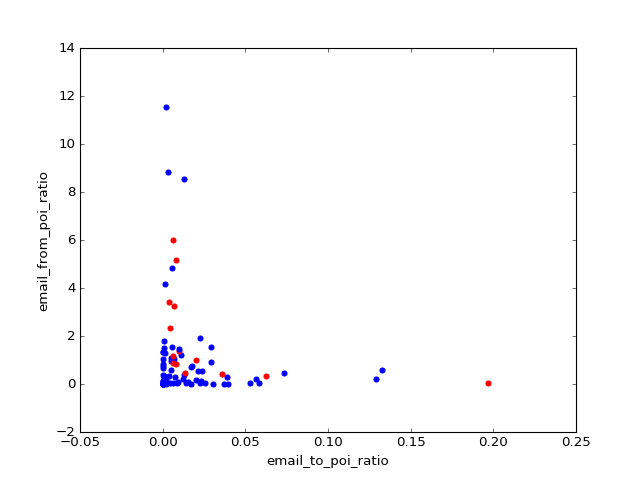

In [14]:
my_data_utils.plot_two(data_dict, 'email_to_poi_ratio', 'email_from_poi_ratio')

<IPython.core.display.Javascript object>


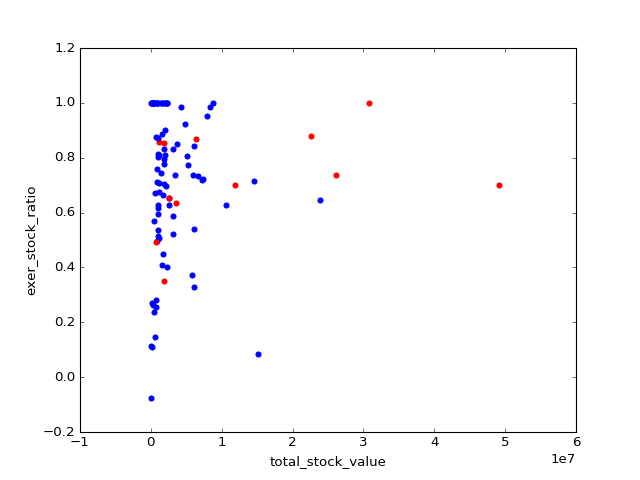

In [15]:
my_data_utils.plot_two(data_dict, 'total_stock_value', 'exer_stock_ratio')

In [16]:
print data_dict[data_dict.keys()[0]]

feature_set = set()
for key in data_dict:
    feature_set = feature_set.union(data_dict[key].keys())
print feature_set

{'to_messages': 807, 'deferral_payments': 'NaN', 'expenses': 94299, 'poi': False, 'deferred_income': 'NaN', 'email_address': 'mark.metts@enron.com', 'long_term_incentive': 'NaN', 'restricted_stock_deferred': 'NaN', 'shared_receipt_with_poi': 702, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'director_fees': 'NaN', 'email_from_poi_ratio': 1.3103448275862069, 'bonus': 600000, 'total_stock_value': 585062, 'from_poi_to_this_person': 38, 'from_this_person_to_poi': 1, 'restricted_stock': 585062, 'salary': 365788, 'total_payments': 1061827, 'email_to_poi_ratio': 0.0012391573729863693, 'exercised_stock_options': 'NaN', 'exer_stock_ratio': 'NaN'}
set(['to_messages', 'email_from_poi_ratio', 'restricted_stock_deferred', 'deferral_payments', 'bonus', 'total_stock_value', 'expenses', 'from_this_person_to_poi', 'poi', 'deferred_income', 'shared_receipt_with_poi', 'email_address', 'long_term_incentive', 'salary', 'total_payments', 'loan_advances', 'restricted_stock', 'email_to_poi_rati

In [17]:

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html


In [18]:
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
print "Train:"
my_classifier_utils.count_true(labels_train)
my_classifier_utils.count_false(labels_train)
print "Test:"
my_classifier_utils.count_true(labels_test)
my_classifier_utils.count_false(labels_test)


Train:
True Count:14
False Count:85
Test:
True Count:4
False Count:39


39

In [19]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
nb_pred = my_classifier_utils.trainAndTestClassifier(clf, features_train, 
                    features_test, labels_train, labels_test)
print nb_pred

99 Training Points
training time: 0.0 s
predict time: 0.0 s
accuracy: 0.818181818182
Train Precision: 0.333333333333
Train Recall: 0.285714285714

43 Test Points
predict time: 0.0 s
accuracy: 0.860465116279
6 Wrong ones: [(19, 0.0), (20, 0.0), (25, 0.0), (35, 1.0), (36, 1.0), (42, 0.0)]
2 True Positives: [11, 22]
35 True Negatives: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 21, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41]
4 False Positives: [19, 20, 25, 42]
2 False Negatives: [35, 36]
Precision: 0.333333333333
Recall: 0.5

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  1.  1.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.]


<IPython.core.display.Javascript object>


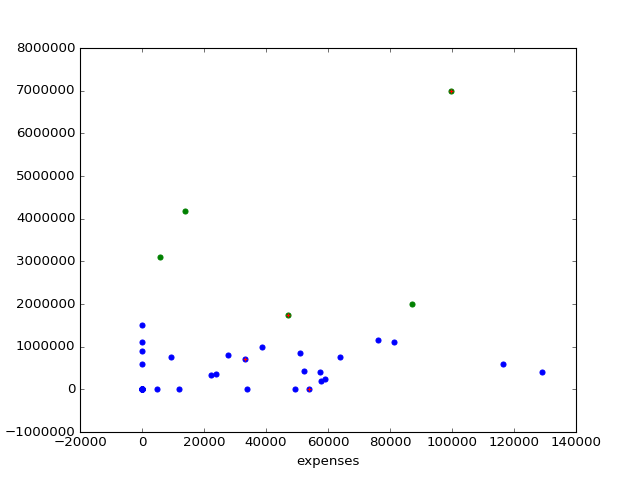

In [20]:
my_data_utils.Draw(nb_pred, features_test, labels_test, True, 'nb_test.png', features_list, 'expenses', 'bonus')

In [21]:
from sklearn.svm import SVC
svClf = SVC(kernel="linear")
svm_pred = my_classifier_utils.trainAndTestWithScale(svClf, features_train, features_test, labels_train, labels_test)
print svm_pred

99 Training Points
training time: 0.0 s
predict time: 0.0 s
accuracy: 0.858585858586
Train Precision: 0.0
Train Recall: 0.0

43 Test Points
predict time: 0.0 s
accuracy: 0.906976744186
4 Wrong ones: [(11, 1.0), (22, 1.0), (35, 1.0), (36, 1.0)]
0 True Positives: []
39 True Negatives: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42]
0 False Positives: []
4 False Negatives: [11, 22, 35, 36]
Precision: 0.0
Recall: 0.0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


C:\Users\KCRAVOTT\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
from sklearn.svm import SVC
rbfClf = SVC(kernel="rbf")
rbf_pred = my_classifier_utils.trainAndTestClassifier (rbfClf, features_train, features_test, labels_train, labels_test)
print rbf_pred

99 Training Points
training time: 0.0 s
predict time: 0.0 s
accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0

43 Test Points
predict time: 0.0 s
accuracy: 0.906976744186
4 Wrong ones: [(11, 1.0), (22, 1.0), (35, 1.0), (36, 1.0)]
0 True Positives: []
39 True Negatives: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42]
0 False Positives: []
4 False Negatives: [11, 22, 35, 36]
Precision: 0.0
Recall: 0.0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [23]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(features_train)
scaled_features_train = scaler.transform(features_train)
scaled_features_test = scaler.transform(features_test)

In [24]:
from sklearn.svm import SVC
scaled_svClf = SVC(kernel="linear")
scaled_svm_pred = my_classifier_utils.trainAndTestWithScale(scaled_svClf, scaled_features_train,
                                                            scaled_features_test, labels_train, labels_test)
print scaled_svm_pred

99 Training Points
training time: 0.0 s
predict time: 0.0 s
accuracy: 0.858585858586
Train Precision: 0.0
Train Recall: 0.0

43 Test Points
predict time: 0.0 s
accuracy: 0.906976744186
4 Wrong ones: [(11, 1.0), (22, 1.0), (35, 1.0), (36, 1.0)]
0 True Positives: []
39 True Negatives: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42]
0 False Positives: []
4 False Negatives: [11, 22, 35, 36]
Precision: 0.0
Recall: 0.0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [25]:
from sklearn.svm import SVC
scaled_svClf = SVC(kernel="rbf")
scaled_svm_pred = my_classifier_utils.trainAndTestWithScale(scaled_svClf, scaled_features_train,
                                                            scaled_features_test, labels_train, labels_test)
print scaled_svm_pred

99 Training Points
training time: 0.0 s
predict time: 0.0 s
accuracy: 0.858585858586
Train Precision: 0.0
Train Recall: 0.0

43 Test Points
predict time: 0.0 s
accuracy: 0.906976744186
4 Wrong ones: [(11, 1.0), (22, 1.0), (35, 1.0), (36, 1.0)]
0 True Positives: []
39 True Negatives: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42]
0 False Positives: []
4 False Negatives: [11, 22, 35, 36]
Precision: 0.0
Recall: 0.0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [26]:
from sklearn import tree
dtClf = tree.DecisionTreeClassifier()
dt_pred = my_classifier_utils.trainAndTestClassifier (dtClf, features_train, features_test, labels_train, labels_test)
print dt_pred

99 Training Points
training time: 0.0 s
predict time: 0.0 s
accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0

43 Test Points
predict time: 0.0 s
accuracy: 0.767441860465
10 Wrong ones: [(4, 0.0), (11, 1.0), (19, 0.0), (21, 0.0), (25, 0.0), (27, 0.0), (35, 1.0), (36, 1.0), (39, 0.0), (42, 0.0)]
1 True Positives: [22]
32 True Negatives: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 37, 38, 40, 41]
7 False Positives: [4, 19, 21, 25, 27, 39, 42]
3 False Negatives: [11, 35, 36]
Precision: 0.125
Recall: 0.25

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  1.  0.  0.  1.]


In [27]:
print 'DT Importance:'
for i in range (0,len(features_list)-1):
    print features_list[i+1], ":", dtClf.feature_importances_[i]

DT Importance:
salary : 0.0820690438337
bonus : 0.225906362545
total_payments : 0.0
exercised_stock_options : 0.159596453966
shared_receipt_with_poi : 0.0
expenses : 0.352600424785
email_to_poi_ratio : 0.0799957820966
email_from_poi_ratio : 0.0998319327731
exer_stock_ratio : 0.0


<IPython.core.display.Javascript object>


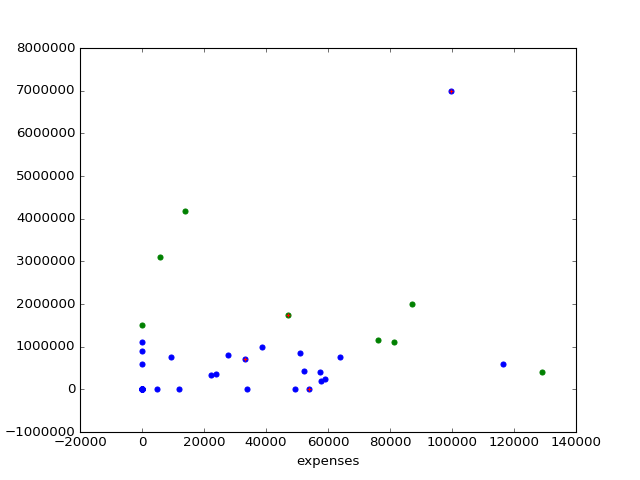

In [28]:
my_data_utils.Draw(dt_pred, features_test, labels_test, True, 'dt_test.png', features_list, 'expenses', 'bonus')

In [29]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
kn_pred = my_classifier_utils.trainAndTestClassifier (neigh, features_train, features_test, labels_train, labels_test)
print kn_pred

99 Training Points
training time: 0.0 s
predict time: 0.0 s
accuracy: 0.919191919192
Train Precision: 0.8
Train Recall: 0.571428571429

43 Test Points
predict time: 0.0 s
accuracy: 0.883720930233
5 Wrong ones: [(11, 1.0), (22, 1.0), (35, 1.0), (36, 1.0), (42, 0.0)]
0 True Positives: []
38 True Negatives: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41]
1 False Positives: [42]
4 False Negatives: [11, 22, 35, 36]
Precision: 0.0
Recall: 0.0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.]


In [30]:
parameters = {'n_neighbors':[2,3,5,8,10,15], 'leaf_size':[3,10,30,75]}
temp_kn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
knGridClf = GridSearchCV(temp_kn, parameters, scoring='f1')
knGrid_pred = my_classifier_utils.trainAndTestClassifier (knGridClf, features_train, features_test, labels_train, labels_test)
print knGrid_pred
print knGridClf.best_params_

99 Training Points


C:\Users\KCRAVOTT\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


training time: 0.27 s
predict time: 0.0 s
accuracy: 0.919191919192
Train Precision: 0.8
Train Recall: 0.571428571429

43 Test Points
predict time: 0.0 s
accuracy: 0.883720930233
5 Wrong ones: [(11, 1.0), (22, 1.0), (35, 1.0), (36, 1.0), (42, 0.0)]
0 True Positives: []
38 True Negatives: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41]
1 False Positives: [42]
4 False Negatives: [11, 22, 35, 36]
Precision: 0.0
Recall: 0.0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.]
{'n_neighbors': 3, 'leaf_size': 3}


In [31]:
from sklearn.ensemble import AdaBoostClassifier
abcDT = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME")
abcDT_pred = my_classifier_utils.trainAndTestClassifier (abcDT, features_train, features_test, labels_train, labels_test)
print abcDT_pred

99 Training Points
training time: 0.071 s
predict time: 0.0 s
accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0

43 Test Points
predict time: 0.0 s
accuracy: 0.953488372093
2 Wrong ones: [(35, 1.0), (36, 1.0)]
2 True Positives: [11, 22]
39 True Negatives: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42]
0 False Positives: []
2 False Negatives: [35, 36]
Precision: 1.0
Recall: 0.5

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


In [32]:
print 'AB Importance:'
for i in range (0,len(features_list)-1):
    print features_list[i+1], ":", abcDT.feature_importances_[i]

AB Importance:
salary : 0.140475207904
bonus : 0.114773504593
total_payments : 0.107482507215
exercised_stock_options : 0.164734472594
shared_receipt_with_poi : 0.028200531679
expenses : 0.247680005047
email_to_poi_ratio : 0.153334408414
email_from_poi_ratio : 0.0227344350073
exer_stock_ratio : 0.0205849275454


<IPython.core.display.Javascript object>


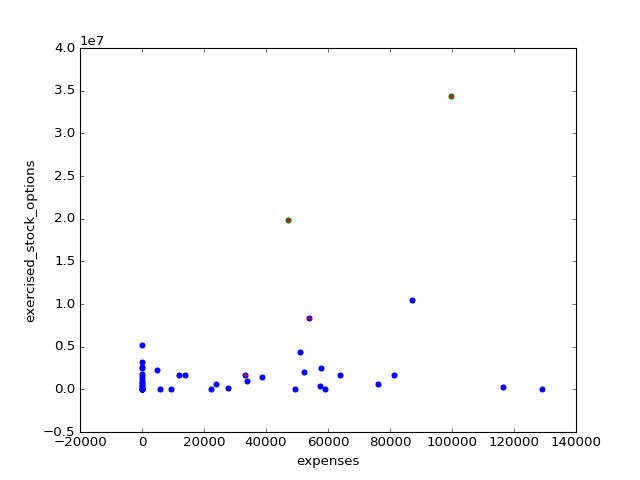

In [33]:
my_data_utils.Draw(abcDT_pred, features_test, labels_test, True,
     'abc_test.png', features_list, 'expenses', 'exercised_stock_options')

In [34]:
from sklearn.cross_validation import train_test_split
random_features_train, random_features_test, random_labels_train, random_labels_test = \
    train_test_split(features, labels, test_size=0.3)
from sklearn.ensemble import AdaBoostClassifier
rand_abc = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME")
rand_abc_pred = my_classifier_utils.trainAndTestClassifier (
    rand_abc, random_features_train, random_features_test, random_labels_train, random_labels_test)
print rand_abc_pred

99 Training Points
training time: 0.18 s
predict time: 0.0 s
accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0

43 Test Points
predict time: 0.0 s
accuracy: 0.813953488372
8 Wrong ones: [(3, 0.0), (9, 0.0), (14, 0.0), (17, 0.0), (18, 0.0), (21, 0.0), (29, 1.0), (36, 1.0)]
1 True Positives: [40]
34 True Negatives: [0, 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 19, 20, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 41, 42]
6 False Positives: [3, 9, 14, 17, 18, 21]
2 False Negatives: [29, 36]
Precision: 0.142857142857
Recall: 0.333333333333

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.  0.  0.  1.
  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  0.  0.]


In [35]:
my_classifier_utils.my_k_fold_test(abcDT, features, labels)

K  0 ABC
94 Training Points
training time: 0.07 s
predict time: 0.0 s
accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0

48 Test Points
predict time: 0.0 s
accuracy: 0.8125
9 Wrong ones: [(4, 0.0), (7, 1.0), (15, 1.0), (20, 1.0), (22, 1.0), (24, 1.0), (29, 1.0), (41, 1.0), (45, 0.0)]
0 True Positives: []
39 True Negatives: [0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 23, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 46, 47]
2 False Positives: [4, 45]
7 False Negatives: [7, 15, 20, 22, 24, 29, 41]
Precision: 0.0
Recall: 0.0

[ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
K  1 ABC
95 Training Points
training time: 0.07 s
predict time: 0.0 s
accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0

47 Test Points
predict time: 0.0 s
accuracy: 0.829787234043
8 Wrong ones: [(0, 0.0), (4, 1.0), (15, 1

In [36]:
parameters = {'max_depth':[2,3,5,8,10,15], 'min_samples_split':[2,3,5], 'criterion' : ['gini','entropy']}
tempDTClf = tree.DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
gridClf = GridSearchCV(tempDTClf, parameters, scoring='f1')
grid_pred = my_classifier_utils.trainAndTestClassifier (gridClf, features_train, features_test, labels_train, labels_test)
print grid_pred
print gridClf.best_params_

99 Training Points
training time: 0.25 s
predict time: 0.0 s
accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0

43 Test Points
predict time: 0.0 s
accuracy: 0.767441860465
10 Wrong ones: [(4, 0.0), (8, 0.0), (11, 1.0), (19, 0.0), (21, 0.0), (25, 0.0), (27, 0.0), (35, 1.0), (36, 1.0), (42, 0.0)]
1 True Positives: [22]
32 True Negatives: [0, 1, 2, 3, 5, 6, 7, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 23, 24, 26, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41]
7 False Positives: [4, 8, 19, 21, 25, 27, 42]
3 False Negatives: [11, 35, 36]
Precision: 0.125
Recall: 0.25

[ 0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  1.  0.  1.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.]
{'min_samples_split': 3, 'criterion': 'gini', 'max_depth': 8}


<IPython.core.display.Javascript object>


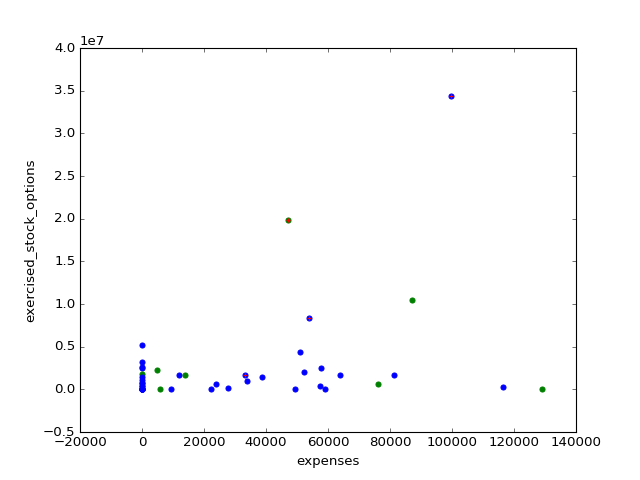

In [37]:
my_data_utils.Draw(grid_pred, features_test, labels_test, True,
     'grid_dt_test.png', features_list, 'expenses', 'exercised_stock_options')

In [38]:
print 'Grid DT Importance:'
for i in range (0,len(features_list)-1):
    print features_list[i+1], ":", gridClf.best_estimator_.feature_importances_[i]

Grid DT Importance:
salary : 0.0245335972227
bonus : 0.281368547419
total_payments : 0.0
exercised_stock_options : 0.17774771447
shared_receipt_with_poi : 0.0
expenses : 0.352600424785
email_to_poi_ratio : 0.0266068589598
email_from_poi_ratio : 0.0816806722689
exer_stock_ratio : 0.0554621848739


In [39]:
my_classifier_utils.my_k_fold_test(gridClf, features, labels)

K  0 ABC
94 Training Points
training time: 0.25 s
predict time: 0.0 s
accuracy: 0.978723404255
Train Precision: 0.909090909091
Train Recall: 0.909090909091

48 Test Points
predict time: 0.0 s
accuracy: 0.770833333333
11 Wrong ones: [(7, 1.0), (15, 1.0), (20, 1.0), (22, 1.0), (24, 1.0), (26, 0.0), (29, 1.0), (30, 0.0), (33, 0.0), (41, 1.0), (45, 0.0)]
0 True Positives: []
37 True Negatives: [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 23, 25, 27, 28, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 46, 47]
4 False Positives: [26, 30, 33, 45]
7 False Negatives: [7, 15, 20, 22, 24, 29, 41]
Precision: 0.0
Recall: 0.0

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
K  1 ABC
95 Training Points
training time: 0.24 s
predict time: 0.0 s
accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0

47 Test Points
predict time: 0.0 s
a

In [40]:
dump_classifier_and_data(gridClf, my_dataset, features_list)